In [1]:
# importing required modules

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset

df = pd.read_csv("TimeSeries.csv")

# displaying the dataframe
df

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
0,181199,0,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,105.0,NaN,NaN
1,181199,0,102.0,73.0,90.0,17.0,NaN,NaN,NaN,114.0,NaN,127.0,100.0,36.599998
2,181199,0,78.0,57.0,130.0,9.0,NaN,NaN,169.0,116.0,NaN,NaN,100.0,36.599998
3,181199,0,88.0,62.0,107.0,11.0,NaN,NaN,138.0,115.0,NaN,NaN,100.0,36.500000
4,181199,0,116.0,82.0,132.0,11.0,NaN,NaN,NaN,120.0,NaN,NaN,100.0,36.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29444,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29445,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29446,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Performing basic summary statistics


In [3]:
# describing the data
df.describe()

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
count,29448.000000,29448.00000,17836.000000,17884.000000,17884.000000,13939.000000,1047.000000,512.000000,4142.000000,20114.000000,1746.000000,1599.000000,19323.000000,12908.000000
mean,150729.435208,0.04401,77.389549,57.381626,118.825263,11.386311,1.453486,91.741797,125.361661,86.259471,10.403110,143.520951,97.071236,37.239037
std,29351.498391,0.20512,14.705526,11.362053,21.895607,5.191388,1.319426,22.899203,39.294528,14.466417,1.481641,65.167057,3.134375,1.859348
min,100059.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,26.000000,33.000000,4.500000,26.000000,0.500000,0.000000
25%,125858.000000,0.00000,68.000000,50.000000,104.000000,8.000000,0.800000,76.750002,101.000000,77.000000,9.400000,99.500000,96.000000,37.000000
50%,151246.000000,0.00000,75.000000,56.000000,116.000000,11.000000,1.100000,88.800003,120.000000,86.000000,10.300000,131.000000,97.000000,37.400002
75%,175905.000000,0.00000,84.000000,64.000000,131.000000,14.000000,1.500000,104.500000,142.000000,95.000000,11.200000,174.000000,99.000000,37.799999
max,199998.000000,1.00000,287.000000,155.000000,227.000000,48.000000,12.500000,208.199997,600.000000,208.000000,17.100000,689.000000,100.000000,39.700001


# How many unique patients are in the dataset?

In [4]:
# how many patients are there? (equates to rows per PatientID)
df.nunique()

PatientID                 1126
Mortality                    2
MeanBP                     146
DiasBP                      98
SysBP                      169
Centralvenouspressure       50
Creatinine                  63
DailyWeight                334
Glucose                    231
HeartRate                  125
Haemoglobin                134
Platelets                  266
SpO2                        43
Temperature C               75
dtype: int64

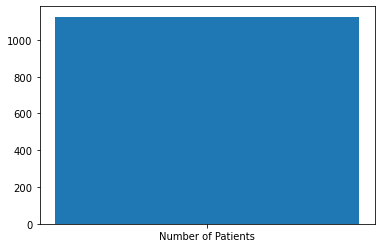

In [5]:
# plotting the number of patients

plt.bar(x="Number of Patients", height=df.nunique())
plt.show()

There are 1126 unique patients in this dataset.

# How many recording intervals per patient?

The hypothetical data is from 24-hour measurements of patient data. Is the number of intervals the same for each patient?

In [6]:
# number of rows in the dataframe per patient
df.PatientID.value_counts()

108976    120
194933     96
104732     72
145055     72
103127     72
         ... 
153822     24
184687     24
125320     24
145922     24
172028     24
Name: PatientID, Length: 1126, dtype: int64

In [7]:
# average number of rows per patient

df.PatientID.value_counts().mean()

26.152753108348136

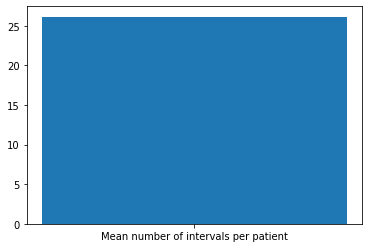

In [8]:
# plotting the mean number of intervals per patient

plt.bar(x="Mean number of intervals per patient", height=df.PatientID.value_counts().mean())
plt.show()

The number of intervals per patient differs; with the average number of intervals per patient being 26.

## Average number of weight recordings per patient

In [9]:
# average number of weight recordings per patient

# select DailyWeight column, and sort it by PatientID.
# count the measurements of weight per patient, using value_counts().
# return the average number of weight measurements per patient, for the entire dataset with mean().

df.DailyWeight.groupby(df.PatientID).value_counts().mean()

1.0940170940170941

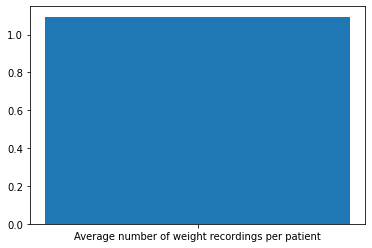

In [10]:
# plotting the mean number of weight recordings per patient

plt.bar(x="Average number of weight recordings per patient",
        height=df.DailyWeight.groupby(df.PatientID).value_counts().mean())
plt.show()

The average number of weight recordings per patient is 1.09.

# Calculating and plotting the Mean Arterial Pressure (MAP)

In [11]:
# create a function that calculates the MAP for each patient, and plug those values into a new df column

# a list that stores the MAP value for EACH row
MAP_list = []

# creating a function that calculates the MAP for each row
def MAP_calc(sys, dias):
    
    # missing values cause an error, so a try-except sequence is required
    try:
        MAP = ((sys) + (2*dias)) / 3
        return(round(MAP))
    
    except:
        return(None)


# for each row in the dataframe
for index, row in df.iterrows():
    
    # calling the MAP_calc function, and parsing the systolic, and diastolic values
    # returned value is stored in the list
    MAP_list.append(MAP_calc(row['SysBP'], row['DiasBP']))
    
# adding the list values to a new dataframe column
df['MAP'] = MAP_list

# displaying the dataframe
df

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,MAP
0,181199,0,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,105.0,NaN,NaN,NaN
1,181199,0,102.0,73.0,90.0,17.0,NaN,NaN,NaN,114.0,NaN,127.0,100.0,36.599998,79.0
2,181199,0,78.0,57.0,130.0,9.0,NaN,NaN,169.0,116.0,NaN,NaN,100.0,36.599998,81.0
3,181199,0,88.0,62.0,107.0,11.0,NaN,NaN,138.0,115.0,NaN,NaN,100.0,36.500000,77.0
4,181199,0,116.0,82.0,132.0,11.0,NaN,NaN,NaN,120.0,NaN,NaN,100.0,36.500000,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29444,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29445,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29446,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


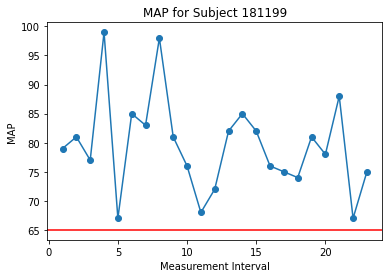

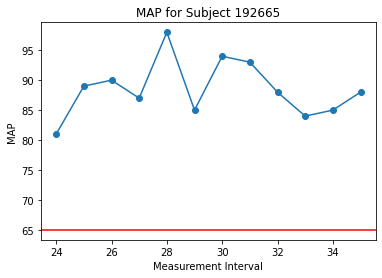

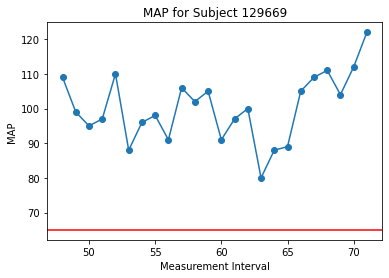

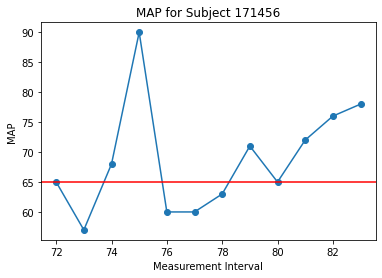

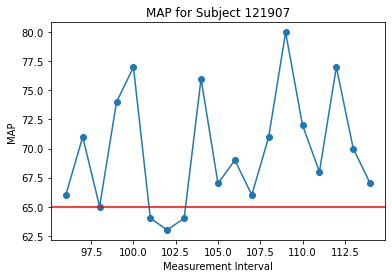

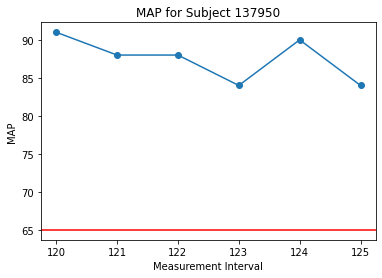

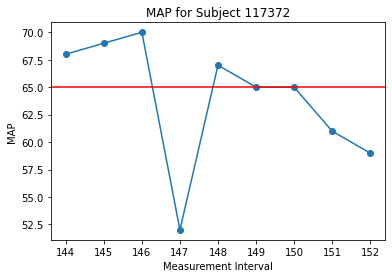

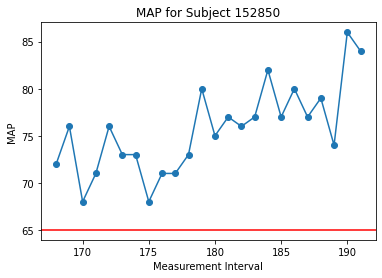

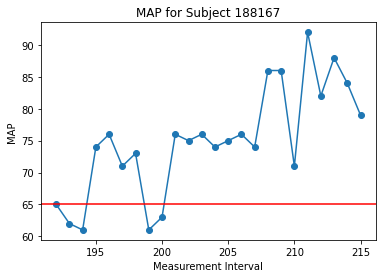

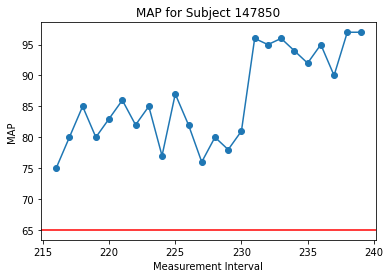

In [12]:
# plotting MAP per patient

# storing unique subject ids
subject_ids = df.PatientID.unique()

# storing number of repeats to only plot 10 graphs
i = 0

# iterate through unique subjects in the list
for subject in subject_ids:
    
    # setting plot parameters
    subset = df.loc[df.PatientID==subject]
    plt.scatter(x=subset.index, y=subset.MAP)
    plt.plot(subset.index, subset.MAP) # stating x=, and y= results in an error
    plt.axhline(y=65, color='red') # line to indicate minimum MAP
    plt.title(f"MAP for Subject {subject}")
    plt.xlabel("Measurement Interval")
    plt.ylabel("MAP")
    plt.show()
    
    # stop after plotting 10 plots
    i += 1
    if i == 10:
        break


# Create a plot of missingness for each recorded variable

In [13]:
df.MeanBP.isna().sum()

11612

In [14]:
# calculating the percentage missingness of each column

# stores the total number of rows in the dataframe, which is equal to the number of PatientIDs
total_rows = len(df.index)
#print(f"The total number of rows is {total_rows}")

# list of columns
data = {'PatientID': [],
        'Mortality': [],
        'MeanBP': [],
        'DiasBP': [], 
        'SysBP': [], 
        'Centralvenouspressure ': [], 
        'Creatinine': [], 
        'DailyWeight': [],
        'Glucose': [], 
        'HeartRate': [], 
        'Haemoglobin': [], 
        'Platelets': [], 
        'SpO2': [], 
        'Temperature C': [], 
        'MAP': []}

for column in df.columns[:]:
    
    #print(f"The column is {column}")
    missing_values = df[column].isna().sum()
    #print(f"Number of missing values {missing_values}")
    missing_percent = round((missing_values / total_rows) * 100)
    #print(f"Percentage missing {missing_percent}")
    data[column] = missing_percent
    #print("Added new column")
    #print("")

# converting the data dictionary to a pandas df
missing_df = pd.DataFrame(data, index=[0])

# displaying df
missing_df

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,MAP
0,0,0,39,39,39,53,96,98,86,32,94,95,34,56,39


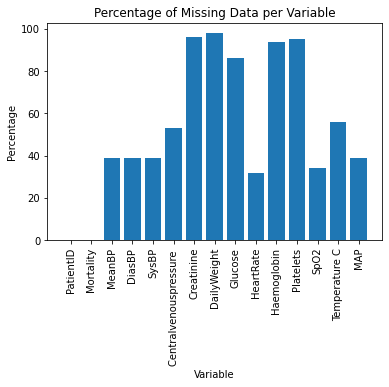

In [15]:
# converting the data from a wide format to a long format
missing_df_long = pd.melt(missing_df)

# plotting the bar chart
plt.bar(x=missing_df_long.variable, height=missing_df_long.value)
plt.title("Percentage of Missing Data per Variable")
plt.ylabel("Percentage")
plt.xlabel("Variable")
plt.xticks(rotation=90)
plt.show()

# What is the percentage mortality?

In [16]:
pd.set_option('display.max_rows', 10)

# number of patients
num_patients = df.PatientID.nunique()

# creating new df with ID and Mortality columns only, where mortality is equal to 1
sorted_df = df.loc[df['Mortality']==1, ['PatientID', 'Mortality']]

# using new dataframe to select the ID column, and then calculate the number of unique IDs
# this is equal to the number of people that passed away
num_mortalities = sorted_df.PatientID.nunique()

# calculating the percentage mortality
# rounding the results to 2dp to avoid false precision
percentage_mortality = round((num_mortalities / num_patients) * 100, 2)

# displaying the results
print(f"""
Number of patients: {num_patients}
The number of mortalities: {num_mortalities}
Percentage mortality: {percentage_mortality}%
""")


Number of patients: 1126
The number of mortalities: 49
Percentage mortality: 4.35%



# Aggregating the patient vitals

In [17]:
# aggregating the several rows per patient into summary columns
# e.g. the several heart rate variables should be condensed into a single row with the maximum measurement observed

# testing aggregate function
df.aggregate(['mean', 'min', 'max'])

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,MAP
mean,150729.435208,0.04401,77.389549,57.381626,118.825263,11.386311,1.453486,91.741797,125.361661,86.259471,10.40311,143.520951,97.071236,37.239037,77.861768
min,100059.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,26.000000,33.000000,4.50000,26.000000,0.500000,0.000000,0.000000
max,199998.000000,1.00000,287.000000,155.000000,227.000000,48.000000,12.500000,208.199997,600.000000,208.000000,17.10000,689.000000,100.000000,39.700001,159.000000


In [18]:
# creating a new df storing aggregates values for a patient's vitals
agg_df = df.groupby('PatientID').aggregate({
                         'Mortality':'max',
                         'DailyWeight':'min',
                         'Glucose':'min',
                         'Creatinine':'max',
                         'Haemoglobin':'max',
                         'HeartRate':'max',
                         'SpO2':'max',
                         'Platelets':'max',
                         'Temperature C':'max',
                         'DiasBP':'mean',
                         'SysBP':'mean',
                         'MeanBP':'mean',
                         'Centralvenouspressure ':['min','mean']}).round(decimals=2)

# displaying the df
agg_df

Mortality DailyWeight Glucose Creatinine Haemoglobin HeartRate  \
                max         min     min        max         max       max   
PatientID                                                                  
100059            0        91.4    45.0        0.7        11.7     100.0   
100298            0        84.3    79.0        0.6        10.7      93.0   
100321            0        69.6     NaN        NaN         7.1      94.0   
100336            0         NaN   134.0        2.8        11.4     116.0   
100392            0         NaN   114.0        0.9         9.3     110.0   
...             ...         ...     ...        ...         ...       ...   
199876            0        63.9     NaN        NaN        11.9     126.0   
199877            0         NaN     NaN        NaN         NaN      90.0   
199963            0         NaN   153.0        3.5        10.4     113.0   
199993            0         NaN     NaN        NaN         NaN      74.0   
199998            0        86.3    88.0        0.8         9.3      86.0   

            SpO2 Platelets Temperature C DiasBP   SysBP  MeanBP  \
             max       max           max   mean    mean    mean   
PatientID                                                         
100059     100.0     162.0          37.7  53.25  125.96   74.42   
100298     100.0     372.0          38.5  55.71   99.38   72.13   
100321     100.0      86.0          37.1  51.84  117.37   72.42   
100336      96.0     133.0          37.1  61.44   93.33   74.33   
100392      96.0     116.0          37.8  57.88  100.88   70.50   
...          ...       ...           ...    ...     ...     ...   
199876     100.0      69.0          37.4  53.09  122.05   76.14   
199877      99.0       NaN          36.7  75.00  166.50  108.00   
199963     100.0     196.0          37.9  60.36  105.50   72.00   
199993     100.0       NaN          37.1  64.50  103.25   77.75   
199998     100.0     144.0          38.0  48.06  124.12   70.06   

          Centralvenouspressure          
                             min   mean  
PatientID                                
100059                       8.0  12.62  
100298                       5.0   9.55  
100321                       9.0  13.00  
100336                       9.0  15.25  
100392                       8.0   9.60  
...                          ...    ...  
199876                       8.0   8.00  
199877                       9.0  11.00  
199963                      13.0  15.14  
199993                      13.0  15.50  
199998                       6.0  10.57  

[1126 rows x 14 columns]

# Compare the mortality of patients by heart rate and temperature

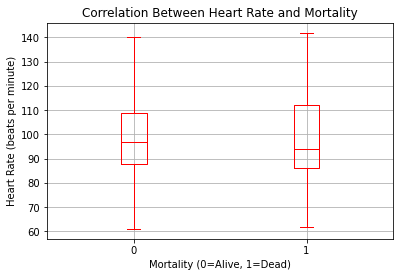

In [19]:
# creating a new df to store max heartrate and corresponding mortality and patientID
mortality_hr_df = df[['PatientID', 'Mortality', 'HeartRate']].copy()
mortality_hr_df = mortality_hr_df.groupby(['PatientID', 'Mortality']).aggregate({'HeartRate':'max'})

# plotting max heartrate by mortality
mortality_hr_df.boxplot(by='Mortality', column='HeartRate', showfliers=False, color='red')
plt.xlabel('Mortality (0=Alive, 1=Dead)')
plt.ylabel('Heart Rate (beats per minute)')
plt.suptitle('')
plt.title('Correlation Between Heart Rate and Mortality')
plt.show()


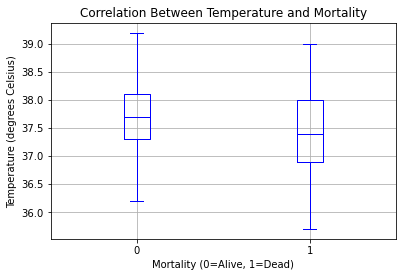

In [20]:
# creating a new df to store max temperature and corresponding mortality and patientID
mortality_temp_df = df[['PatientID', 'Mortality', 'Temperature C']].copy()
mortality_temp_df = mortality_temp_df.groupby(['PatientID', 'Mortality']).aggregate({'Temperature C':'max'})

# plotting max temperature by mortality
mortality_temp_df.boxplot(by='Mortality', column='Temperature C', showfliers=False, color='blue')
plt.xlabel('Mortality (0=Alive, 1=Dead)')
plt.ylabel('Temperature (degrees Celsius)')
plt.suptitle('')
plt.title('Correlation Between Temperature and Mortality')
plt.show()


# Does heart rate and temperature impact mortality?

My analysis points towards there being no difference in heart rate between the states of mortality. This is because the median values are very similar, and so is the spread of data. The only minor difference is if mortality is 1, then the inter-quartile range is wider apart. However, the difference is so small that I do not believe heart rate correlates to mortality (according to the data).

Regarding the temperature, it appears as though the median temperature of patients who died is slightly less than those who haven't. Suggests that mortality is linked to a slightly colder body temperature. However, the difference is so small, and there is so much overlap in the data that it is difficult to say with certainty.

In order to be more conclusive, a statistical test should be run to test for significance.

However, the results observed could be due to the small sample of patients that have passed away. A much larger sample would give more conclusive evidence.

Additionally, the dataset does not state what the reason the patient came into hospital for. Association between heart rate and mortality is more likely if the patient came in for a heart related problem such as a myocardial infarction.